In [138]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [220]:
print(df.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [86]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

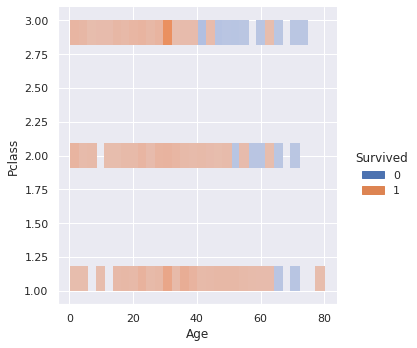

In [74]:
sns.displot(x='Age', y='Pclass', data=df, hue='Survived')


In [13]:
missing_data = df[df['Age'].isnull()]
missing_data

#print(missing_ages.groupby('Sex').size())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [94]:
df_cleaned = df.fillna(df['Age'].mean())
df_cleaned.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.6991,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.6991,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.6991,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,29.6991,Q


In [21]:
table = pd.crosstab(df['Survived'],df['Sex'])
print(table)

Sex       female  male
Survived              
0             81   468
1            233   109


<AxesSubplot:xlabel='Survived'>

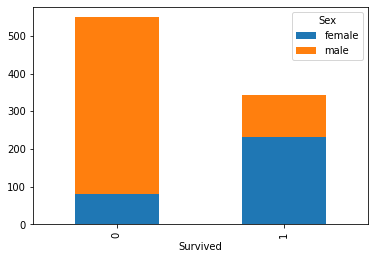

In [22]:
table.plot(kind='bar',stacked=True)


<AxesSubplot:xlabel='Survived'>

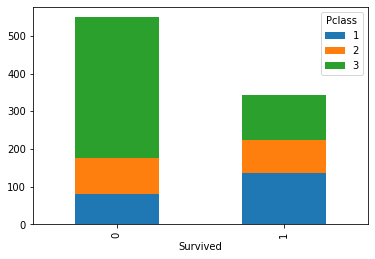

In [25]:
table1 = pd.crosstab(df['Survived'], df['Pclass'])
table1.plot(kind='bar',stacked=True)


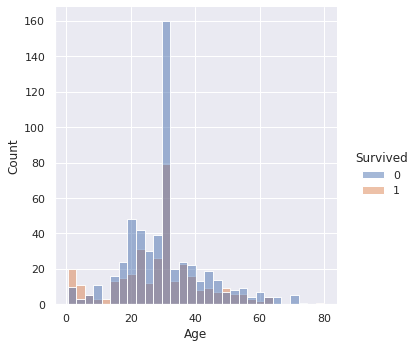

In [76]:
sns.set()
sns.displot(x = 'Age', hue = 'Survived', data = df_cleaned)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

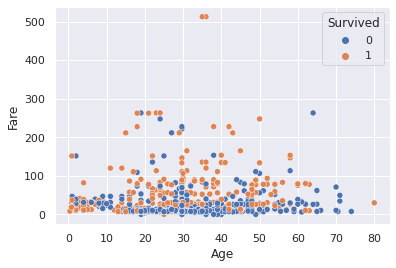

In [27]:
sns.scatterplot(x='Age', y='Fare', data=df_cleaned, hue='Survived')


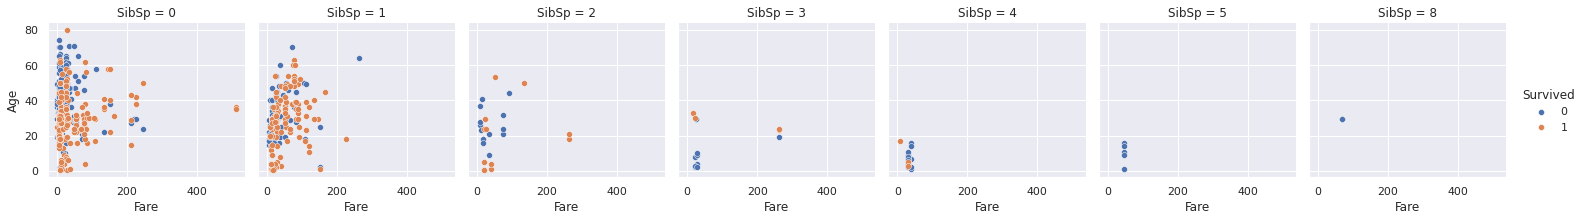

In [218]:
grid = sns.FacetGrid(data=df_cleaned, col='SibSp', hue='Survived')
grid.map_dataframe(sns.scatterplot, x='Fare', y='Age')
grid.add_legend()
grid.set_xlabels("Fare")
grid.set_ylabels("Age")
sns.set(rc={'figure.figsize':(10,5)})

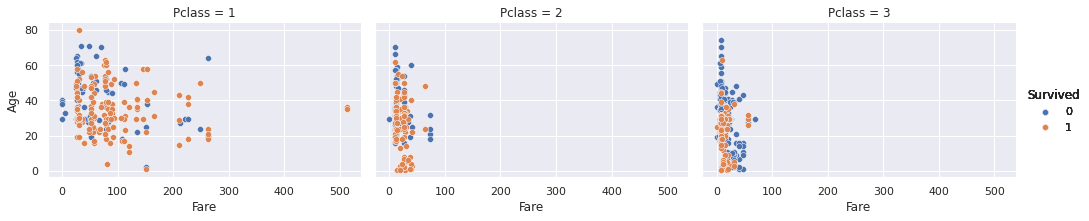

In [217]:
rid = sns.FacetGrid(data=df_cleaned, col='SibSp', hue='Survived')
grid.map_dataframe(sns.scatterplot, x='Fare', y='Age')
grid.add_legend()
grid.set_xlabels("Fare")
grid.set_ylabels("Age")
sns.set(rc={'figure.figsize':(10,5)})

In [40]:
df_cleaned[df_cleaned['Sex'].str.match("female")].count()


PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            314
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin          314
Embarked       314
dtype: int64

In [41]:
df_cleaned[df_cleaned['Sex'].str.match("male")].count()


PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            577
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          577
Embarked       577
dtype: int64

In [42]:
df_cleaned[df_cleaned["Name"].str.contains("Brown")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,29.6991,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,29.6991,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,29.6991,S


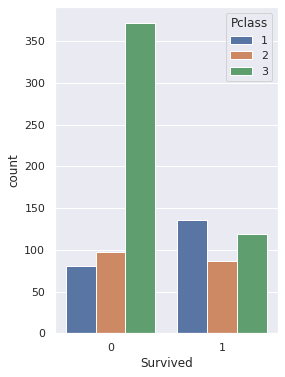

In [55]:
sns.countplot(x='Survived', hue='Pclass', data=df_cleaned)
sns.set(rc={'figure.figsize':(25,6)})


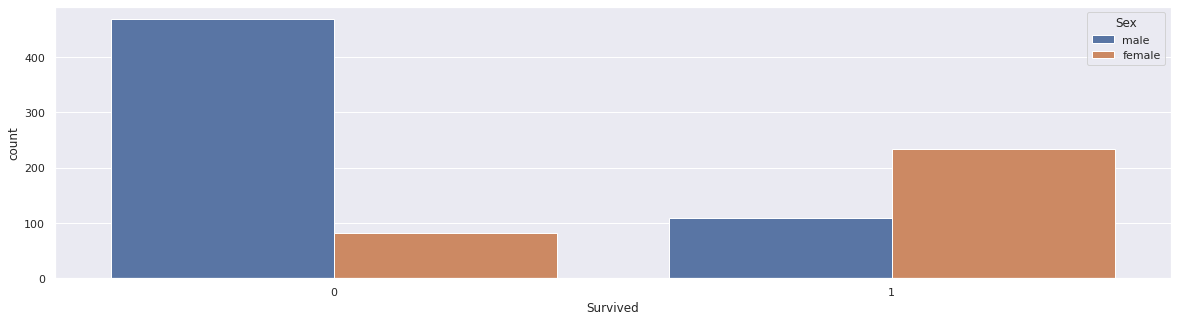

In [68]:
sns.countplot(x='Survived', hue='Sex', data=df_cleaned)
sns.set(rc={'figure.figsize':(10,5)})

In [95]:
df_cleaned.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [192]:
df_clean = df_cleaned.drop(['Cabin', 'Embarked', 'Ticket'], axis=1 )
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000


In [107]:
df_clean['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [116]:
y = df_cleaned['Survived']
X = df_cleaned.loc[:, df.columns != 'Survived']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [119]:
X_train.shape, X_test.shape

((668, 11), (223, 11))

In [121]:
from sklearn.preprocessing import OneHotEncoder

In [123]:
one_hot = OneHotEncoder(sparse=False)

In [125]:
one_hot.fit(X_train[['Pclass']])

OneHotEncoder(sparse=False)

In [ ]:
one_hot.transform(X_train[['Pclass']])


In [127]:
one_hot.get_feature_names()

array(['x0_1', 'x0_2', 'x0_3'], dtype=object)

In [128]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [226]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Pclass']),
    (OneHotEncoder(sparse=False), ['Sex']),
    (StandardScaler(), ['Age', 'Fare']
    ))
    

In [227]:
transformer

ColumnTransformer(transformers=[('onehotencoder-1', OneHotEncoder(sparse=False),
                                 ['Pclass']),
                                ('onehotencoder-2', OneHotEncoder(sparse=False),
                                 ['Sex']),
                                ('standardscaler', StandardScaler(),
                                 ['Age', 'Fare'])])

In [228]:
# use the column transformer to fit it in the TRAIN data and transform the TEST data

transformer.fit(X_train)
X_test_trans = transformer.transform(X_train)
X_test_trans

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.01799611,  0.50099699],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -1.46157514,  1.77834566],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.41969519,  0.15003536],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         2.74352209, -0.49501044],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.00543425,  0.0163681 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.52710909, -0.49146624]])

In [229]:
X_train_trans = transformer.transform(X_train)
X_test_trans = transformer.transform(X_test)

In [230]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_trans, y_train)

LogisticRegression(max_iter=1000)

In [231]:
y_pred = model.predict(X_test_trans)
len(y_pred)

223

In [232]:
accuracy_score(y_pred, y_test)

0.8699551569506726

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       141
           1       0.81      0.84      0.83        82

    accuracy                           0.87       223
   macro avg       0.86      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



In [208]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[125,  16],
       [ 13,  69]])